In [1]:
import pandas as pd
import openpyxl
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# from fbprophet import Prophet

In [2]:
import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

In [3]:
# data files
file_path = 'sampletests_plcdata copy.xlsx'
workbook = openpyxl.load_workbook(file_path)
sheet_names = workbook.sheetnames

In [4]:
dataframes = {}  # Dictionary to store the dataframes for each sheet

for sheet_name in sheet_names:
    sheet = workbook[sheet_name]
    data = sheet.values
    columns = next(data)  # Assumes the first row contains column headers
    df = pd.DataFrame(data, columns=columns)
    dataframes[sheet_name] = df

In [5]:
for sheet_name, df in dataframes.items():
    print(f"Sheet: {sheet_name}")
    print(df.head())  # Perform any desired operations on the dataframe
    print()

Sheet: 4252
            Date Time  .tDevTop  .tDevBot        KW  currentSP  tDevTemp  \
0 2020-06-12 10:18:44 -2.124058 -2.134764  4.815453       25.0 -2.133694   
1 2020-06-12 10:18:46 -1.323046 -1.739798  4.285715       25.0 -1.698124   
2 2020-06-12 10:18:48 -0.234201 -1.128325  3.090732       25.0 -1.038914   
3 2020-06-12 10:18:50  1.056076 -0.364960  1.735104       25.0 -0.222857   
4 2020-06-12 10:18:52  2.048887  0.254839  0.410203       25.0  0.434244   

   FanPc  TemperatureControl  stOn  cmSettling Time  cmRamp Rate  Test Band  \
0  100.0                 0.0   1.0            300.0        500.0        0.2   
1  100.0                 0.0   1.0            300.0        500.0        0.2   
2  100.0                 0.0   1.0            300.0        500.0        0.2   
3  100.0                 0.0   1.0            300.0        500.0        0.2   
4  100.0                 0.0   1.0            300.0        500.0        0.2   

   TemperatureControl.Du  stTop T/100  stBot T/100  
0  

In [6]:
dfs = {}  # Dictionary to store the DataFrames

for i, (key, value) in enumerate(dataframes.items(), start=1):
    # Create a new DataFrame using the associated values
    df = pd.DataFrame(value)
    # Set the dynamic variable name as df1, df2, etc.
    var_name = 'df{}'.format(i)
    # Assign the DataFrame to the dynamic variable using exec()
    exec("{} = df".format(var_name))
    # Store the DataFrame in the dfs dictionary
    dfs[var_name] = df

# Accessing the DataFrames
print(df2.head())  # Example access of df1

            Date Time  .tDevTop  .tDevBot        KW  currentSP  tDevTemp  \
0 2020-06-18 12:17:52 -0.499218 -0.779226  1.709823       25.0 -0.751225   
1 2020-06-18 12:17:54 -0.205910 -0.609358  1.455226       25.0 -0.569014   
2 2020-06-18 12:17:56  0.220900 -0.358622  0.997106       25.0 -0.300671   
3 2020-06-18 12:17:58  0.696096 -0.052870  0.384175       25.0  0.022026   
4 2020-06-18 12:18:00  1.054909  0.192711 -0.152610       25.0  0.278931   

   FanPc  TemperatureControl  stOn  cmSettling Time  cmRamp Rate  Test Band  \
0  100.0                 0.0   1.0             60.0        500.0        5.0   
1  100.0                 0.0   1.0             60.0        500.0        5.0   
2  100.0                 0.0   1.0             60.0        500.0        5.0   
3  100.0                 0.0   1.0             60.0        500.0        5.0   
4  100.0                 0.0   1.0             60.0        500.0        5.0   

   TemperatureControl.Du  stTop T/100  stBot T/100  
0              

In [7]:
dfs.keys()
# df1['Date Time'] = pd.to_datetime(df1['Date Time'])
# df1['Date Time'] = df1['Date Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
# df1.set_index('Date Time', inplace=True)
# df1.head()

dict_keys(['df1', 'df2', 'df3', 'df4', 'df5', 'df6', 'df7', 'df8', 'df9', 'df10'])

In [114]:
df1.to_csv('temperature_profile.csv')

In [8]:
def create_plot(data):   
    plt.figure(figsize=(12,8))
    data[['stTop T/100','stBot T/100', 'currentSP']].plot()
    plt.title('Time Series Plot')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

<Figure size 864x576 with 0 Axes>

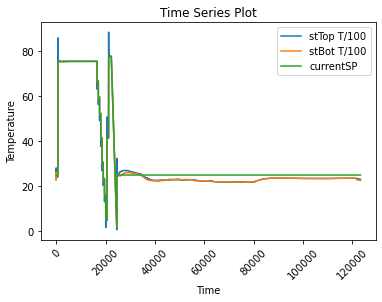

In [9]:
create_plot(df1)

In [10]:
# Make a copy
data = df1.copy()

In [11]:
data.head()

,Date Time,.tDevTop,.tDevBot,KW,currentSP,tDevTemp,FanPc,TemperatureControl,stOn,cmSettling Time,cmRamp Rate,Test Band,TemperatureControl.Du,stTop T/100,stBot T/100
0,2020-06-12 10:18:44,-2.124058,-2.134764,4.815453,25.0,-2.133694,100.0,0.0,1.0,300.0,500.0,0.2,0.0,22.879999,22.870001
1,2020-06-12 10:18:46,-1.323046,-1.739798,4.285715,25.0,-1.698124,100.0,0.0,1.0,300.0,500.0,0.2,0.0,23.680000,23.260000
2,2020-06-12 10:18:48,-0.234201,-1.128325,3.090732,25.0,-1.038914,100.0,0.0,1.0,300.0,500.0,0.2,0.0,24.770000,23.870001
3,2020-06-12 10:18:50,1.056076,-0.364960,1.735104,25.0,-0.222857,100.0,0.0,1.0,300.0,500.0,0.2,0.0,26.059999,24.639999
4,2020-06-12 10:18:52,2.048887,0.254839,0.410203,25.0,0.434244,100.0,0.0,1.0,300.0,500.0,0.2,0.0,27.049999,25.250000


<Figure size 864x576 with 0 Axes>

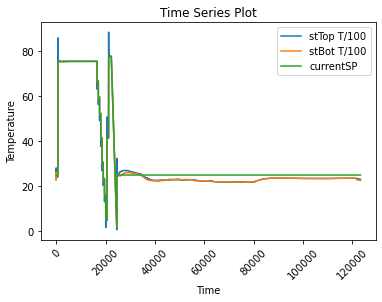

In [12]:
create_plot(data)

In [13]:
data.isnull().sum()
data.dropna(inplace=True)
data.shape

(123363, 15)

In [14]:
#Calculated temp values
data['temp'] = ((0.1*data['stTop T/100']) + (0.9*data['stBot T/100']))
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123363 entries, 0 to 123362
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Date Time              123363 non-null  datetime64[ns]
 1   .tDevTop               123363 non-null  float64       
 2   .tDevBot               123363 non-null  float64       
 3   KW                     123363 non-null  float64       
 4   currentSP              123363 non-null  float64       
 5   tDevTemp               123363 non-null  float64       
 6   FanPc                  123363 non-null  float64       
 7   TemperatureControl     123363 non-null  float64       
 8   stOn                   123363 non-null  float64       
 9   cmSettling Time        123363 non-null  float64       
 10  cmRamp Rate            123363 non-null  float64       
 11  Test Band              123363 non-null  float64       
 12  TemperatureControl.Du  123363 non-null  floa

In [15]:
ramp = data[22000:24580]
static = data[16000:20550]

<Figure size 864x576 with 0 Axes>

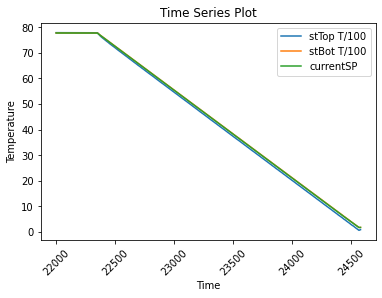

<Figure size 864x576 with 0 Axes>

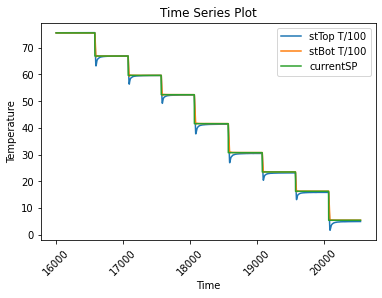

In [16]:
create_plot(ramp)
create_plot(static)

In [17]:
ramp = ramp[['Date Time', 'temp']]
ramp.info()
ramp = ramp.set_index(['Date Time'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 22000 to 24579
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date Time  2580 non-null   datetime64[ns]
 1   temp       2580 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 60.5 KB


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

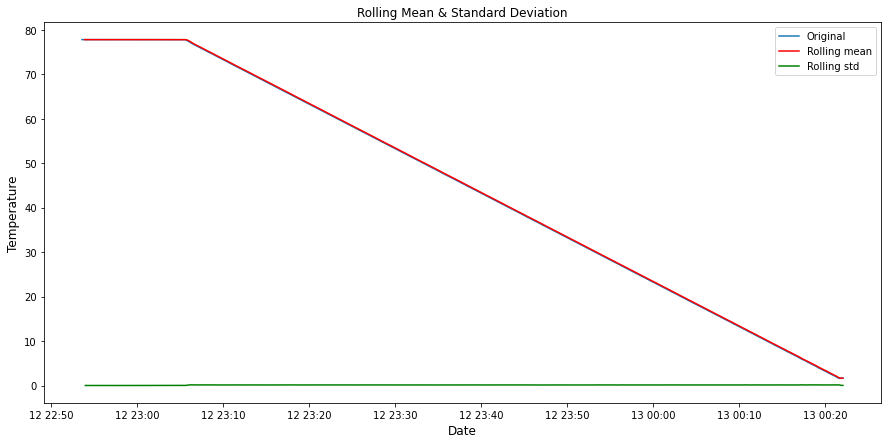

In [18]:
# Assessing stationarity
plt.figure(figsize=(15,7))
plt.plot(ramp['temp'], label='Original')
plt.plot(ramp['temp'].rolling(window=10).mean(), color='red', label='Rolling mean')
plt.plot(ramp['temp'].rolling(window=12).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [19]:
X = ramp['temp'].values
print('Shape of data \t', data.shape)
print('Original dataset: \n', data.head())
print('Temperature values: \n', X)

Shape of data 	 (123363, 16)
Original dataset: 
             Date Time  .tDevTop  .tDevBot        KW  currentSP  tDevTemp  \
0 2020-06-12 10:18:44 -2.124058 -2.134764  4.815453       25.0 -2.133694   
1 2020-06-12 10:18:46 -1.323046 -1.739798  4.285715       25.0 -1.698124   
2 2020-06-12 10:18:48 -0.234201 -1.128325  3.090732       25.0 -1.038914   
3 2020-06-12 10:18:50  1.056076 -0.364960  1.735104       25.0 -0.222857   
4 2020-06-12 10:18:52  2.048887  0.254839  0.410203       25.0  0.434244   

   FanPc  TemperatureControl  stOn  cmSettling Time  cmRamp Rate  Test Band  \
0  100.0                 0.0   1.0            300.0        500.0        0.2   
1  100.0                 0.0   1.0            300.0        500.0        0.2   
2  100.0                 0.0   1.0            300.0        500.0        0.2   
3  100.0                 0.0   1.0            300.0        500.0        0.2   
4  100.0                 0.0   1.0            300.0        500.0        0.2   

   TemperatureContr

In [20]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller

In [21]:
dftest = adfuller(ramp, autolag='AIC')
print('ADF: ', dftest[0])
print('p-value: ', dftest[1])
print('Num of Lags: ', dftest[2])
print('Observations used: ', dftest[3])
print('Critical Values: ')
for key, val in dftest[4].items():
    print("\t", key, ": ", val)

ADF:  -1.1038767023046105
p-value:  0.713523447493539
Num of Lags:  21
Observations used:  2558
Critical Values: 
	 1% :  -3.4329089813516065
	 5% :  -2.8626705556366505
	 10% :  -2.56737183663938


In [22]:
def seasonal_decompose (df):
    decomposition = sm.tsa.seasonal_decompose(df, model='additive', extrapolate_trend=12, period=1)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual

In [23]:
ramp.head()

,temp
Date Time,
2020-06-12 22:53:33,77.753998
2020-06-12 22:53:35,77.753998
2020-06-12 22:53:37,77.745002
2020-06-12 22:53:39,77.752999
2020-06-12 22:53:41,77.744003


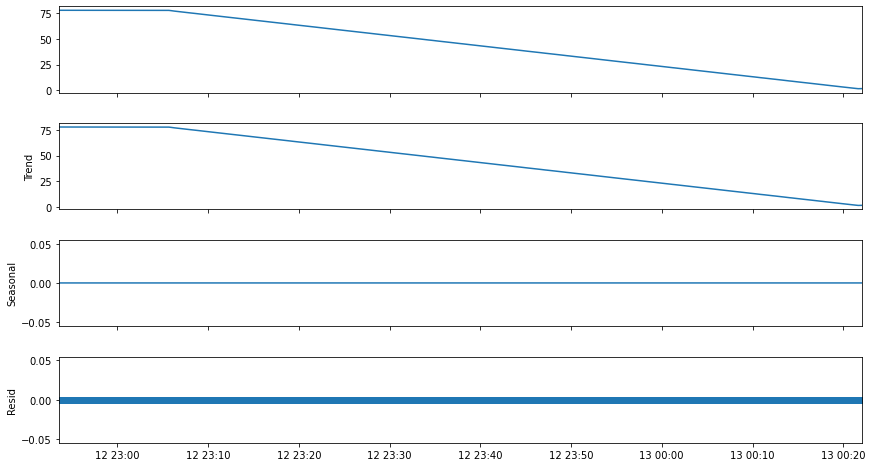

In [24]:
trend, seasonal, residual = seasonal_decompose(ramp)

In [27]:
train_data = ramp[:int(len(ramp)*0.7)]
test_data = ramp[int(len(ramp)*0.7):]

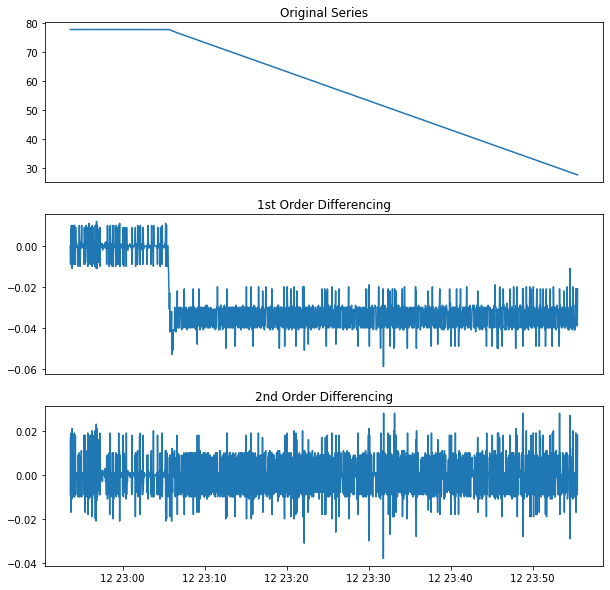

In [28]:
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10, 10))
ax1.plot(train_data.temp)
ax1.set_title('Original Series')
ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(train_data.temp.diff())
ax2.set_title('1st Order Differencing')
ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(train_data.temp.diff().diff())
ax3.set_title('2nd Order Differencing')
plt.show()

Text(0.5, 1.0, 'Autocorrelation for second-order differencing')

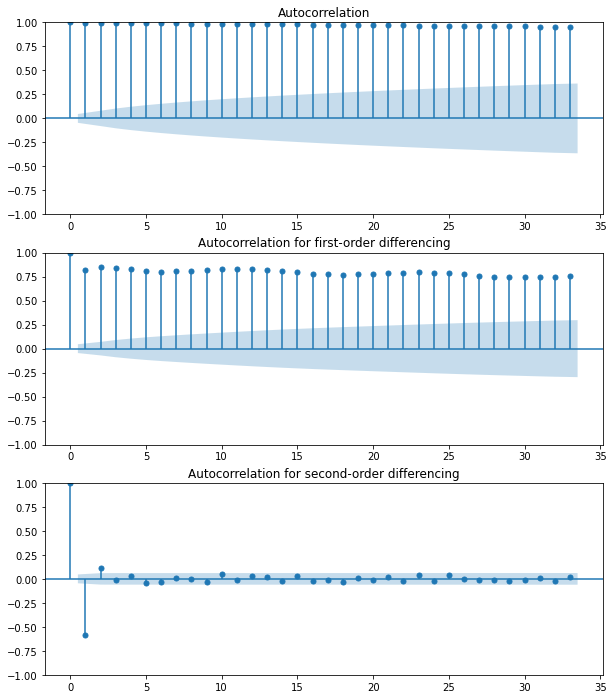

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))
_ = plot_acf(train_data.temp, ax=ax1)
_ = plot_acf(train_data.temp.diff().dropna(), ax=ax2)
ax2.set_title('Autocorrelation for first-order differencing')
_ = plot_acf(train_data.temp.diff().diff().dropna(), ax=ax3)
ax3.set_title('Autocorrelation for second-order differencing')

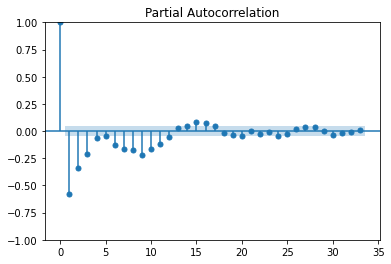

In [30]:
_ = plot_pacf(train_data.temp.diff().diff().dropna())

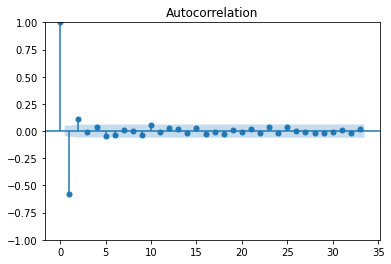

In [31]:
_ = plot_acf(train_data.temp.diff().diff().dropna())
# p =13
# q = 2
# d= 2

In [81]:
ARIMA_model = pm.auto_arima(train_data)
ARIMA_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1805
Model:               SARIMAX(0, 2, 5)   Log Likelihood                6574.198
Date:                Fri, 02 Jun 2023   AIC                         -13136.395
Time:                        12:18:20   BIC                         -13103.412
Sample:                             0   HQIC                        -13124.221
                               - 1805                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9675      0.022    -43.600      0.000      -1.011      -0.924
ma.L2          0.2221      0.032      6.877      0.000       0.159       0.285
ma.L3         -0.0175      0.033     -0.538      0.591      -0.081       0.046
ma.L4         -0.0272      0.032     -0.848      0.396      -0.090       0.036
ma.L5         -0.0973      0.023     -4.294      0.000      -0.142      -0.053
sigma2      3.975e-05   1.23e-06     32.449      0.000    3.74e-05    4.22e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.08
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
model = ARIMA(train_data, order=(0, 2, 5))
model_fit = model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1805
Model:                 ARIMA(0, 2, 5)   Log Likelihood                6574.198
Date:                Fri, 02 Jun 2023   AIC                         -13136.395
Time:                        12:18:42   BIC                         -13103.412
Sample:                             0   HQIC                        -13124.221
                               - 1805                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9675      0.022    -43.600      0.000      -1.011      -0.924
ma.L2          0.2221      0.032      6.877      0.000       0.159       0.285
ma.L3         -0.0175      0.033     -0.538      0.591      -0.081       0.046
ma.L4         -0.0272      0.032     -0.848      0.396      -0.090       0.036
ma.L5         -0.0973      0.023     -4.294      0.000      -0.142      -0.053
sigma2      3.975e-05   1.23e-06     32.449      0.000    3.74e-05    4.22e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                18.80
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.08
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
start=len(train_data)
end=len(ramp)-1

Text(0, 0.5, 'Temperature')

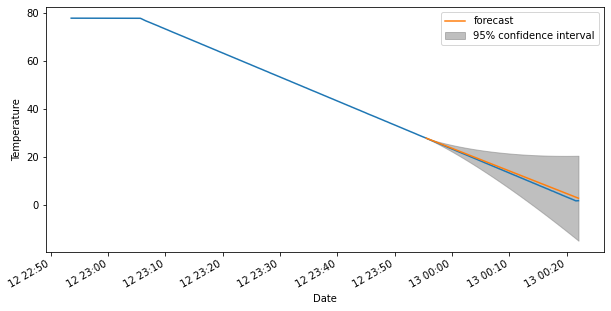

In [84]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(ramp)
plot_predict(model_fit, start=start, end=end, ax=axs, index=ramp.index[start:end+1])
plt.xlabel('Date')
plt.ylabel('Temperature')

In [85]:
# Accounting for ramp rate:
ramp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2580 entries, 2020-06-12 22:53:33 to 2020-06-13 00:22:03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    2580 non-null   float64
dtypes: float64(1)
memory usage: 40.3 KB


In [86]:
ramp.head(10)

,temp
Date Time,
2020-06-12 22:53:33,77.753998
2020-06-12 22:53:35,77.753998
2020-06-12 22:53:37,77.745002
2020-06-12 22:53:39,77.752999
2020-06-12 22:53:41,77.744003
2020-06-12 22:53:43,77.753998
2020-06-12 22:53:45,77.753998
2020-06-12 22:53:48,77.743003
2020-06-12 22:53:50,77.752999


In [96]:
time_interval = (ramp.index[-1] - ramp.index[0]).total_seconds()
temperature_change = ramp['temp'].iloc[-1] - ramp['temp'].iloc[0]
ramp_rate = temperature_change / time_interval
ramp['ramp_rate'] = ramp_rate
ramp.head()

,temp,ramp_rate
Date Time,,
2020-06-12 22:53:33,77.753998,-0.014325
2020-06-12 22:53:35,77.753998,-0.014325
2020-06-12 22:53:37,77.745002,-0.014325
2020-06-12 22:53:39,77.752999,-0.014325
2020-06-12 22:53:41,77.744003,-0.014325


In [99]:
train_data = ramp[:int(len(ramp)*0.7)]
test_data = ramp[int(len(ramp)*0.7):]

In [102]:
model = ARIMA(train_data['temp'], order=(0, 2, 5), exog=train_data['ramp_rate'])
model_fit = model.fit()
model_fit.summary()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   temp   No. Observations:                 1805
Model:                 ARIMA(0, 2, 5)   Log Likelihood                6574.206
Date:                Fri, 02 Jun 2023   AIC                         -13134.412
Time:                        12:34:56   BIC                         -13095.932
Sample:                             0   HQIC                        -13120.209
                               - 1805                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ramp_rate  -8.427e-10        nan        nan        nan         nan         nan
ma.L1         -0.9675      0.022    -43.556      0.000      -1.011      -0.924
ma.L2          0.2213      0.032      6.845      0.000       0.158       0.285
ma.L3         -0.0172      0.033     -0.528      0.597      -0.081       0.047
ma.L4         -0.0265      0.032     -0.825      0.409      -0.090       0.036
ma.L5         -0.0982      0.023     -4.330      0.000      -0.143      -0.054
sigma2      3.979e-05   1.23e-06     32.409      0.000    3.74e-05    4.22e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.14   Skew:                            -0.08
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.62e+26. Standard errors may be unstable.
"""

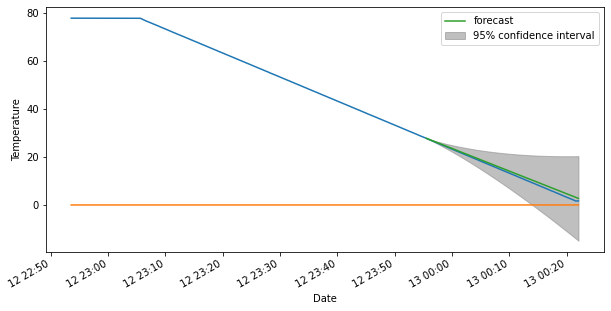

In [112]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))
plt.plot(ramp)
plot_predict(model_fit, start=start, end=end, ax=axs, index=ramp.index[start:end+1], exog=test_data['ramp_rate'], alpha=0.05)
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()